In [ ]:
# %load_ext IPython.extensions.autoreload
# %autoreload 0

# # -*- coding: utf-8 -*-

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import openpyxl

import sys
import os
import runpy

import requests
from io import StringIO
import json

import json
import glob
from pathlib import Path

In [ ]:
# os.chdir(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo")

In [2]:
target_excels_fpath = r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\inputs\3. treatment\_target_excels"

# Operationalisation of variables

### TERYT reference tabels

In [4]:
# ref_tab = pd.read_excel(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\inputs\shapefiles\polska\teryt_klucz_powiaty_gminy_lata_1999_2025-1.xlsx")

In [5]:
# sorted(ref_tab.nazwa_powiatu.astype(str).unique())

## Dane GUS

### Programme period: 2003-2007 (Bank Danych Lokalnych)

In [6]:
## TOTAL VALUE OF PROJECTS
PL_projects_07_13 = pd.read_excel(r"data\inputs\3. treatment\dane_gov_pl\FE_2007_2013_bez_EFFR.xlsx", header = 0)
PL_projects_07_13.shape
PL_projects_07_13.head()

,Kod,Nazwa,wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2011;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2012;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2013;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2014;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2015;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2016;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2011;[zł],wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2012;[zł],...,wartość całkowita projektów zakończonych;ogółem;środki prywatne (wydatki kwalifikowalne);31 grudnia;2014;[zł],wartość całkowita projektów zakończonych;ogółem;środki prywatne (wydatki kwalifikowalne);31 grudnia;2015;[zł],wartość całkowita projektów zakończonych;ogółem;środki prywatne (wydatki kwalifikowalne);31 grudnia;2016;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2011;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2012;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2013;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2014;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2015;[zł],wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2016;[zł],Unnamed: 86
0,0,POLSKA,3.488748e+11,4.185678e+11,4.793030e+11,5.077507e+11,5.056628e+11,NaN,2.817125e+11,3.396549e+11,...,2.517121e+10,3.354367e+10,NaN,2.129330e+10,3.928128e+10,6.300138e+10,9.270788e+10,1.514780e+11,NaN,NaN
1,200000,DOLNOŚLĄSKIE,2.295337e+10,2.893788e+10,3.585106e+10,3.706013e+10,3.684278e+10,NaN,1.880925e+10,2.290884e+10,...,2.065557e+09,3.107075e+09,NaN,1.151720e+09,2.258852e+09,4.026069e+09,8.525640e+09,1.189545e+10,NaN,NaN
2,201000,Powiat bolesławiecki,3.678199e+08,5.574197e+08,7.127688e+08,7.271226e+08,6.185319e+08,NaN,3.167938e+08,4.698253e+08,...,5.299624e+07,6.991276e+07,NaN,3.523231e+07,4.352682e+07,8.424246e+07,1.105440e+08,1.688417e+08,NaN,NaN
3,201011,Bolesławiec (1),9.927528e+07,1.552865e+08,1.760143e+08,1.928295e+08,1.489005e+08,NaN,8.869087e+07,1.353449e+08,...,3.760551e+06,6.206089e+06,NaN,1.907388e+07,2.526002e+07,3.041824e+07,4.665566e+07,6.106161e+07,NaN,NaN
4,201022,Bolesławiec (2),1.232235e+08,2.340477e+08,2.655266e+08,2.682761e+08,1.999436e+08,NaN,1.160023e+08,2.063344e+08,...,4.435461e+07,5.220537e+07,NaN,4.834202e+06,4.870558e+06,3.653987e+07,3.921499e+07,4.664699e+07,NaN,NaN


In [7]:
cols_to_keep = [ 'Kod' , 'Nazwa',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2011;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2012;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2013;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2014;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2015;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2016;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2011;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2012;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2013;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2014;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2015;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2016;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2011;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2012;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2013;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2014;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2015;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2016;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2011;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2012;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2013;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2014;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2015;[zł]',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2016;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2011;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2012;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2013;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2014;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2015;[zł]',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2016;[zł]',
]

In [8]:
PL_projects_07_13 = PL_projects_07_13[cols_to_keep]

In [9]:
cols_rename_dict = { 'Kod' : 'code' , 'Nazwa' : 'name',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2011;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2011_PLN',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2012;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2012_PLN',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2013;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2013_PLN',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2014;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2014_PLN',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2015;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2015_PLN',
        'wartość całkowita projektów zakończonych;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2016;[zł]' : 'total_eligible_value_completed_projects_EU_funding_2016_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2011;[zł]' : 'total_value_signed_financing_agreements_total_value_2011_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2012;[zł]' : 'total_value_signed_financing_agreements_total_value_2012_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2013;[zł]' : 'total_value_signed_financing_agreements_total_value_2013_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2014;[zł]' : 'total_value_signed_financing_agreements_total_value_2014_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2015;[zł]' : 'total_value_signed_financing_agreements_total_value_2015_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wartość ogółem (wydatki kwalifikowalne + niekwalifikowalne);31 grudnia;2016;[zł]' : 'total_value_signed_financing_agreements_total_value_2016_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2011;[zł]' : 'total_eligible_value_signed_financing_agreements_2011_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2012;[zł]' : 'total_eligible_value_signed_financing_agreements_2012_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2013;[zł]': 'total_eligible_value_signed_financing_agreements_2013_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2014;[zł]' : 'total_eligible_value_signed_financing_agreements_2014_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2015;[zł]': 'total_eligible_value_signed_financing_agreements_2015_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2016;[zł]' : 'total_eligible_value_signed_financing_agreements_2016_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2011;[zł]' : 'total_eligible_value_signed_financing_agreements_EU_funding_2011_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2012;[zł]' : 'total_eligible_value_signed_financing_agreements_EU_funding_2012_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2013;[zł]' : 'total_eligible_value_signed_financing_agreements_EU_funding_2013_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2014;[zł]': 'total_eligible_value_signed_financing_agreements_EU_funding_2014_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2015;[zł]': 'total_eligible_value_signed_financing_agreements_EU_funding_2015_PLN',
        'wartość całkowita podpisanych umów o dofinansowanie;ogółem;dofinansowanie ze środków Unii Europejskiej (wydatki kwalifikowalne);31 grudnia;2016;[zł]' : 'total_eligible_value_signed_financing_agreements_EU_funding_2016_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2011;[zł]' : 'total_eligible_value_completed_projects_2011_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2012;[zł]' : 'total_eligible_value_completed_projects_2012_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2013;[zł]' : 'total_eligible_value_completed_projects_2013_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2014;[zł]' : 'total_eligible_value_completed_projects_2014_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2015;[zł]': 'total_eligible_value_completed_projects_2015_PLN',
        'wartość całkowita projektów zakończonych;ogółem;wydatki kwalifikowalne ogółem;31 grudnia;2016;[zł]' : 'total_eligible_value_completed_projects_2016_PLN',
}

In [10]:
PL_projects_07_13.rename(columns=cols_rename_dict, inplace=True)

In [11]:
PL_projects_07_13.head(3)

,code,name,total_eligible_value_completed_projects_EU_funding_2011_PLN,total_eligible_value_completed_projects_EU_funding_2012_PLN,total_eligible_value_completed_projects_EU_funding_2013_PLN,total_eligible_value_completed_projects_EU_funding_2014_PLN,total_eligible_value_completed_projects_EU_funding_2015_PLN,total_eligible_value_completed_projects_EU_funding_2016_PLN,total_value_signed_financing_agreements_total_value_2011_PLN,total_value_signed_financing_agreements_total_value_2012_PLN,...,total_eligible_value_signed_financing_agreements_EU_funding_2013_PLN,total_eligible_value_signed_financing_agreements_EU_funding_2014_PLN,total_eligible_value_signed_financing_agreements_EU_funding_2015_PLN,total_eligible_value_signed_financing_agreements_EU_funding_2016_PLN,total_eligible_value_completed_projects_2011_PLN,total_eligible_value_completed_projects_2012_PLN,total_eligible_value_completed_projects_2013_PLN,total_eligible_value_completed_projects_2014_PLN,total_eligible_value_completed_projects_2015_PLN,total_eligible_value_completed_projects_2016_PLN
0,0,POLSKA,2.129330e+10,3.928128e+10,6.300138e+10,9.270788e+10,1.514780e+11,NaN,3.488748e+11,4.185678e+11,...,2.676541e+11,2.854900e+11,2.899497e+11,NaN,3.311223e+10,6.167440e+10,9.891130e+10,1.416249e+11,2.214065e+11,NaN
1,200000,DOLNOŚLĄSKIE,1.151720e+09,2.258852e+09,4.026069e+09,8.525640e+09,1.189545e+10,NaN,2.295337e+10,2.893788e+10,...,1.860232e+10,1.948053e+10,1.967197e+10,NaN,1.787704e+09,3.650780e+09,6.678295e+09,1.288829e+10,1.809863e+10,NaN
2,201000,Powiat bolesławiecki,3.523231e+07,4.352682e+07,8.424246e+07,1.105440e+08,1.688417e+08,NaN,3.678199e+08,5.574197e+08,...,3.337926e+08,3.486724e+08,2.863434e+08,NaN,5.335319e+07,7.196908e+07,1.709898e+08,2.119871e+08,2.988681e+08,NaN


In [12]:
# 1. IDENTIFY ID COLUMNS
df = PL_projects_07_13.copy()
id_cols = ['code', 'name'] 

# 2. MELT THE DATAFRAME -->  converts columns to rows
df_melted = df.melt(id_vars=id_cols, var_name='raw_column', value_name='Value_PLN')

# 3. EXTRACT VARIABLE AND YEAR
# We use regex to capture: (Everything before the year) _ (The Year) _ PLN
pattern = r'^(.*)_(\d{4})_PLN$'

extracted_data = df_melted['raw_column'].str.extract(pattern)
df_melted['variable'] = extracted_data[0] # The long variable name
df_melted['Year'] = extracted_data[1]   # The Year (2011, 2012...)

# 4. PIVOT TO DESIRED STRUCTURE
df_final = df_melted.pivot_table(
    index=id_cols + ['variable'], 
    columns='Year', 
    values='Value_PLN',
    aggfunc='sum' # Use sum just in case there are duplicates, usually not needed
).reset_index()

# Optional: Clean up the column names (remove the 'Year' label)
df_final.columns.name = None

In [13]:
df_final['EUR_PL_rate'] = 4.4975

In [14]:
# 1. Define the columns that contain the values to convert
year_cols = ['2011', '2012', '2013', '2014', '2015', '2016']
exchange_rate = 4.4975

# 2. Create a copy of the dataframe so we don't overwrite the PLN data
df_eur = df_final.copy()

# 3. Perform the conversion (Division)
df_eur[year_cols] = df_eur[year_cols] / exchange_rate

# 4. Update the 'variable' column name to reflect the change
df_eur['variable'] = df_eur['variable'] + '_EUR'

df_combined = pd.concat([df_final, df_eur], ignore_index=True)
df_combined = df_combined.sort_values(by=['code', 'variable'])


In [15]:
df_combined.to_parquet(r'data/clean/treatment/eu_flows/gmina_FE_2007_13_pln_eur.parquet')

## Umowy 2007-2013


#### Basic cleaning

In [3]:
umowy_200713_POKL= pd.read_excel(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\inputs\3. treatment\dane_gov_pl\umowy\Umowy_wszystko_POKL_30_06_2018.xls",
                    sheet_name = [0,1],
                    header = 1)

In [4]:
umowy_200713_INNE = pd.read_excel(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\inputs\3. treatment\dane_gov_pl\umowy\Umowy_wszystko_INNE_30_06_2018.xls",
                    sheet_name = [0,1],
                    header = 1)

In [5]:
umowy_200713_INNE_all = pd.concat(umowy_200713_INNE.values(), ignore_index=True)
umowy_200713_POKL_all = pd.concat(umowy_200713_POKL.values(), ignore_index=True)

In [6]:
umowy_200713_INNE_all.rename(columns={
                                "Data rozpoczęcia realizacji " : "Data rozpoczęcia realizacji",
                                "Województwo" : "Województwo.1",
                                "Cały kraj/ Województwo" : "Województwo"
                                },
                                inplace = True
)

In [7]:
umowy_200713_POKL_all.columns == umowy_200713_INNE_all.columns 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
umowy_200713 = pd.concat([umowy_200713_POKL_all, umowy_200713_INNE_all], ignore_index=True)

In [9]:
umowy_200713.columns

Index(['Numer umowy/aneksu/decyzji', 'Tytuł projektu',
       'Program Operacyjny <Nazwa>', 'Oś priorytetowa <Kod>',
       'Działanie <Kod>', 'Poddziałanie <Kod>', 'Województwo', 'Powiat',
       'Gmina', 'Wartość ogółem', 'Wydatki kwalifikowalne', 'Dofinansowanie',
       'Dofinansowanie UE', 'Nazwa beneficjenta', 'NIP beneficjenta',
       'Kod pocztowy', 'Miejscowość', 'Województwo.1', 'Powiat.1',
       'Temat priorytetu', 'Forma prawna', 'Obszar realizacji',
       'Projekt zakończony (Wniosek o płatność końcową)',
       'Data podpisania Umowy/Aneksu',
       'Data utworzenia w KSI SIMIK 07-13 Umowy/Aneksu',
       'Data rozpoczęcia realizacji', 'Data zakończenia realizacji'],
      dtype='object')

METADATA - COLUMNY ORYGINALNE

        'Numer umowy/aneksu/decyzji', 'Tytuł projektu',
        'Program Operacyjny <Nazwa>', 'Oś priorytetowa <Kod>',
        'Działanie <Kod>', 'Poddziałanie <Kod>', 'Województwo', 'Powiat',
        'Gmina', 'Wartość ogółem', 'Wydatki kwalifikowalne', 'Dofinansowanie',
        'Dofinansowanie UE', 'Nazwa beneficjenta', 'NIP beneficjenta',
        'Kod pocztowy', 'Miejscowość', 'Województwo.1', 'Powiat.1',
        'Temat priorytetu', 'Forma prawna', 'Obszar realizacji',
        'Projekt zakończony (Wniosek o płatność końcową)',
        'Data podpisania Umowy/Aneksu',
        'Data utworzenia w KSI SIMIK 07-13 Umowy/Aneksu',
        'Data rozpoczęcia realizacji', 'Data zakończenia realizacji'

In [10]:
rename_dict = {
                "Numer umowy/aneksu/decyzji" : "ID",
                "Tytuł projektu" : "project_title",
                "Program Operacyjny <Nazwa>" : 'program',
                "Oś priorytetowa <Kod>" : 'priority_code',
                "Działanie <Kod>" : "action_code",
                "Poddziałanie <Kod>" : "subaction_code",
                "Województwo" : "voviodeship",
                "Powiat" : "powiat",
                "Gmina" : "gmina",
                "Wartość ogółem" : "total_value_PLN",
                "Wydatki kwalifikowalne" : "eligible_expenses_PLN",
                "Dofinansowanie" : "subsidy_PLN",
                "Dofinansowanie UE" : "EU_subsidy_PLN",
                "Nazwa beneficjenta" : "beneficiary",
                "NIP beneficjenta" : "beneficiary_ID",
                "Kod pocztowy" : "beneficiary_postal_code",
                "Miejscowość" : "beneficiary_city",
                "Województwo.1" : "beneficiary_voviodeship",
                "Powiat.1" : "beneficiary_powiat",
                "Temat priorytetu" : "priority_theme",
                "Forma prawna" : "beneficiary_status",
                "Obszar realizacji" : "terriority_type",
                "Projekt zakończony (Wniosek o płatność końcową)" : "project_completed",
                "Data podpisania Umowy/Aneksu" : "signing_date",
                "Data utworzenia w KSI SIMIK 07-13 Umowy/Aneksu" : "creation_date_KSI_SIMIK_07_12",
                "Data rozpoczęcia realizacji" : "start_date",
                "Data zakończenia realizacji" : "end_date"
}


In [11]:
umowy_200713.rename(columns=rename_dict, inplace=True)

In [34]:
# umowy_200713.to_parquet(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\clean\treatment\eu_flows\intermediary\umowy_200713_clean.parquet", index = False)

In [15]:
#detect related projects
# from rapidfuzz import fuzz

# threshold = 90  # Similarity threshold (0-100)
# related_pairs = []

# ids = umowy_200713['ID'].dropna().unique()

# for i, id1 in enumerate(ids):
#     for id2 in ids[i+1:]:
#         score = fuzz.token_set_ratio(id1, id2)
#         if score > threshold:
#             related_pairs.append((id1, id2, score))

MEATDATA 

For metadata/ data cleaning pipeline

1. projects that covered the entire territory of the country were removed from the analysis 
    - for 2007-2013 projects this is  31 520 023 323.54 zł = 31.5 mln PLN
    - 4917 projektów/ umów
2. For projects where the implementation place (gmina/powiat) was not explicitly coded at the municipal level, the beneficiary's registered address (Miejscowość) was used as a geographic proxy.

   --> To prevent Headquarters Bias (over-attribution to administrative capitals), a keyword exclusion filter was applied. Projects managed by National Ministries, State Authorities, or Central Agencies remained in the "Systemic" category, while funding for local NGOs, schools, and private enterprises was successfully re-attributed to their respective Gminas.

In [12]:

print(sum(umowy_200713["voviodeship"] == 'Cały kraj'))
print(umowy_200713["powiat"].isna().sum())
print(umowy_200713["gmina"].isna().sum())


4917
18248
39185


In [14]:
display(umowy_200713.describe(), umowy_200713.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150551 entries, 0 to 150550
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ID                             150551 non-null  object        
 1   project_title                  150551 non-null  object        
 2   program                        150551 non-null  object        
 3   priority_code                  150551 non-null  object        
 4   action_code                    150551 non-null  object        
 5   subaction_code                 71460 non-null   object        
 6   voviodeship                    150551 non-null  object        
 7   powiat                         132303 non-null  object        
 8   gmina                          111366 non-null  object        
 9   total_value_PLN                150551 non-null  float64       
 10  eligible_expenses_PLN          150551 non-null  float64       
 11  

,total_value_PLN,eligible_expenses_PLN,subsidy_PLN,EU_subsidy_PLN,signing_date,creation_date_KSI_SIMIK_07_12,start_date,end_date
count,1.505510e+05,1.505510e+05,1.505510e+05,1.505510e+05,150551,150551,150551,150551
mean,3.335112e+06,2.681124e+06,2.120429e+06,1.921407e+06,2012-11-15 08:30:48.697119488,2012-12-03 00:32:27.215229184,2011-03-01 22:30:18.041726720,2013-01-28 22:25:59.216478208
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-02-26 00:00:00,2008-01-08 00:00:00,2007-01-01 00:00:00,2007-09-30 00:00:00
25%,9.000000e+04,8.561504e+04,7.200000e+04,6.194123e+04,2010-12-14 00:00:00,2011-01-11 00:00:00,2009-08-17 00:00:00,2011-05-31 00:00:00
50%,3.708853e+05,3.487106e+05,2.698042e+05,2.374947e+05,2012-11-12 00:00:00,2012-11-23 00:00:00,2011-01-01 00:00:00,2012-12-31 00:00:00
75%,1.100571e+06,9.999891e+05,7.788332e+05,6.843347e+05,2014-07-25 00:00:00,2014-08-05 00:00:00,2012-10-01 00:00:00,2014-12-31 00:00:00
max,5.976094e+09,4.501605e+09,3.601284e+09,3.601284e+09,2018-06-28 00:00:00,2018-06-29 00:00:00,2015-12-30 00:00:00,2018-12-31 00:00:00
std,3.410411e+07,2.430345e+07,2.147717e+07,1.941051e+07,NaN,NaN,NaN,NaN


None

In [18]:
# sorted(umowy_200713.columns)

### MAON LOGIC OPERATION AND PROCESSING

In [ ]:
# umowy_200713_filtered = umowy_200713[umowy_200713["voviodeship"] == 'Cały kraj']

In [3]:
os.chdir(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\code\processing\UE_funds_processing")

from GUS_processing_functions import infer_geography, distribute_funding_over_time, read_and_parse


#build_teryt_lookups, assign_geo_ids, date_columns, 

In [17]:
# umowy_200713_infered=pd.read_csv(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\clean\treatment\eu_flows\intermediary\umowy_200713_infered.csv",
#                                  low_memory=False
#                                  )

In [4]:
# Using default file path
umowy_200713_infered = read_and_parse("umowy_200713_infered")
display(umowy_200713_infered.head(2), umowy_200713_infered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150551 entries, 0 to 150550
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ID                             150551 non-null  object        
 1   project_title                  150551 non-null  object        
 2   program                        150551 non-null  object        
 3   priority_code                  150551 non-null  object        
 4   action_code                    150551 non-null  object        
 5   subaction_code                 71460 non-null   object        
 6   voviodeship                    150218 non-null  object        
 7   powiat                         143522 non-null  object        
 8   gmina                          122920 non-null  object        
 9   total_value_PLN                150551 non-null  float64       
 10  Wydatki kwalifikowalne         150551 non-null  float64       
 11  

,ID,project_title,program,priority_code,action_code,subaction_code,voviodeship,powiat,gmina,total_value_PLN,...,beneficiary_voviodeship,beneficiary_powiat,priority_theme,beneficiary_status,terriority_type,project_completed,signing_date,creation_date_KSI_SIMIK_07_12,start_date,end_date
0,POKL.01.01.00-00-002/08-03,Analiza działalności rad zatrudnienia i ich wp...,Program Operacyjny Kapitał Ludzki,POKL.01.00.00,POKL.01.01.00,NaN,Cały kraj,NaN,NaN,146939.5,...,Mazowieckie,Powiat m. st. Warszawa,65 Modernizacja i wzmacnianie instytucji rynku...,państwowa jednostka organizacyjna,00 Nie dotyczy,Tak,2009-10-28,2009-11-10,2008-07-01,2009-10-31
1,POKL.01.01.00-00-003/08-09,Zielona linia. Centrum Informacyjno - Konsulta...,Program Operacyjny Kapitał Ludzki,POKL.01.00.00,POKL.01.01.00,NaN,Cały kraj,NaN,NaN,35900082.0,...,Mazowieckie,Powiat m. st. Warszawa,65 Modernizacja i wzmacnianie instytucji rynku...,państwowa jednostka organizacyjna,00 Nie dotyczy,Tak,2012-02-27,2012-02-27,2008-10-01,2012-12-31


None

In [ ]:
# # remove programmes that but store the treated units in a separate refrence table

# total_value_removed_PLN = umowy_200713.loc[umowy_200713["voviodeship"] == 'Cały kraj', "total_value_PLN"].sum()
# # umowy_200713.drop(umowy_200713[umowy_200713["voviodeship"] == 'Cały kraj'].index)

# print(f"{total_value_removed_PLN}")

In [ ]:
# # remove programmes that but store the treated units in a separate refrence table

# total_value_removed_PLN = umowy_200713_infered.loc[umowy_200713_infered["voviodeship"] == 'Cały kraj', "total_value_PLN"].sum()
# # umowy_200713.drop(umowy_200713[umowy_200713["voviodeship"] == 'Cały kraj'].index)

# print(f"{total_value_removed_PLN}")

25449019392.35


In [ ]:
# print("Geographic information missing (2007-2013):")
# print(f"gmina:{umowy_200713_infered['gmina'].isna().sum()/umowy_200713_infered.shape[0]:.2%}")
# print(f"powiat {umowy_200713_infered['powiat'].isna().sum()/umowy_200713_infered.shape[0]:.2%}")
# print(f"województwo {umowy_200713_infered['voviodeship'].isna().sum()/umowy_200713_infered.shape[0]:.2%}")


Geographic information missing (2007-2012):
gmina:18.35%
powiat 4.67%
województwo 0.22%


In [25]:
# umowy_200713_infered.to_csv(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\clean\treatment\eu_flows\intermediary\umowy_200713_infered.csv",index=False)

In [ ]:
umowy_200713_infered.dtypes

In [5]:
# umowy_200713_infered_distributed = read_and_parse(file_name="umowy_200713_infered_distributed")

umowy_200713_infered_distributed = distribute_funding_over_time(umowy_200713_infered)

display(umowy_200713_infered_distributed.info(), umowy_200713_infered_distributed.head(2))
(print(umowy_200713_infered.shape, umowy_200713_infered_distributed.shape))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406771 entries, 0 to 406770
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ID                             406771 non-null  object        
 1   project_title                  406771 non-null  object        
 2   program                        406771 non-null  object        
 3   priority_code                  406771 non-null  object        
 4   action_code                    406771 non-null  object        
 5   subaction_code                 184778 non-null  object        
 6   voviodeship                    405914 non-null  object        
 7   powiat                         386364 non-null  object        
 8   gmina                          335971 non-null  object        
 9   total_value_PLN                406771 non-null  float64       
 10  Wydatki kwalifikowalne         406771 non-null  float64       
 11  

None

,ID,project_title,program,priority_code,action_code,subaction_code,voviodeship,powiat,gmina,total_value_PLN,...,beneficiary_powiat,priority_theme,beneficiary_status,terriority_type,project_completed,signing_date,creation_date_KSI_SIMIK_07_12,start_date,end_date,Year
0,POKL.01.01.00-00-002/08-03,Analiza działalności rad zatrudnienia i ich wp...,Program Operacyjny Kapitał Ludzki,POKL.01.00.00,POKL.01.01.00,NaN,Cały kraj,NaN,NaN,48979.833333,...,Powiat m. st. Warszawa,65 Modernizacja i wzmacnianie instytucji rynku...,państwowa jednostka organizacyjna,00 Nie dotyczy,Tak,2009-10-28,2009-11-10,2008-07-01,2009-10-31,2008
1,POKL.01.01.00-00-002/08-03,Analiza działalności rad zatrudnienia i ich wp...,Program Operacyjny Kapitał Ludzki,POKL.01.00.00,POKL.01.01.00,NaN,Cały kraj,NaN,NaN,97959.666667,...,Powiat m. st. Warszawa,65 Modernizacja i wzmacnianie instytucji rynku...,państwowa jednostka organizacyjna,00 Nie dotyczy,Tak,2009-10-28,2009-11-10,2008-07-01,2009-10-31,2009


(150551, 27) (406771, 28)


In [13]:
# umowy_200713_infered_distributed

In [6]:
umowy_200713_infered_distributed.to_csv(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\clean\treatment\eu_flows\intermediary\umowy_200713_infered_distributed.csv", index=False)

In [28]:
powiaty_geoms = gpd.read_file(r"C:\Users\jarem\OneDrive - London School of Economics\YEAR 2\1. Policy paper\policy-paper-repo\data\inputs\shapefiles\polska\powiaty\powiaty.shp")

In [53]:
# umowy_200713_infered.info(); umowy_200713_infered_distributed.info()


In [27]:
# print(sum(umowy_200713["voviodeship"] == 'Cały kraj'))
print(umowy_200713_infered["powiat"].isna().sum())
print(umowy_200713_infered["gmina"].isna().sum())

7029
27631


In [28]:
filtered = umowy_200713_infered.loc[
    (umowy_200713_infered["voviodeship"] == "Cały kraj") &
    (umowy_200713_infered["gmina"].notnull())]

In [29]:
umowy_200713.ID.unique()

array(['POKL.01.01.00-00-002/08-03', 'POKL.01.01.00-00-003/08-09',
       'POKL.01.01.00-00-004/08-05', ..., 'RPZP.08.02.00-32-001/15-03',
       'RPZP.08.02.00-32-003/15-01', 'RPZP.08.02.00-32-004/15-03'],
      shape=(105897,), dtype=object)

### Programme period: 2014 - 2020

In [31]:
projects_14_20 = pd.read_excel(r"data\inputs\dane_gus\lista_projektow_UE_2014_20\Lista_projektow_FE_2014_2020_02112025.xlsx", header = 2, decimal=',')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\inputs\\dane_gus\\lista_projektow_UE_2014_20\\Lista_projektow_FE_2014_2020_02112025.xlsx'

In [ ]:
df = projects_14_20.copy()

#### Clean up data

In [ ]:
from src.functions import *

In [ ]:
df.drop(columns=[
    "Tytuł projektu/ Project name",
    "Skrócony opis [do 2000 znaków] / Project summary",
    "Forma finansowania/ Form of finance",
    "Projekt realizowany w ramach terytorialnych mechanizmów wdrażania/ Project implemented under territorial delivery mechanisms",
    "Działanie/ Measure",
    "Poddziałanie/ Submeasure",
    "Dziedzina działalności gospodarczej, której dotyczy projekt/ Area of economic activity",
    "Obszar wsparcia projektu/ Area of project intervention",
    "Cel projektu/ Project thematic objective",
    "Cel uzupełniający dla projektów EFS/ ESF secondary theme"
], inplace=True)
df = clean_english_colnames(df, normalize='keep')   
df = df[df['Fund'] != 'BAR'] 

In [ ]:
df.shape

(103189, 15)

### Programme period 2021-2027

In [25]:
projects_21_27 = pd.read_excel(r"data\inputs\dane_gus\lista_projektow_UE_2021_27\Lista_projektow_FE_2021_2027_02112025.xlsx", header = 1, decimal=',')
df_new = projects_21_27.copy()
#### Clean up 
df_new.drop(columns=[
    "Działanie/ Measure",
    # "Cel szczegółowy/ Specific objective",
    "Priorytet/ Priority", 
    "Działanie/ Measure",
    "Numer identyfikacyjny statku w rejestrze floty rybackiej UE/ The Union fishing fleet register identification number",
    "Nazwa wykonawcy kontraktu/ The contractor’s name",
    "Kategoria wsparcia/ Type of intervention"
], inplace=True)

df_new = clean_english_colnames(df_new, normalize='keep')   
df_new = df_new[df_new['Fund'] != 'BAR'] 

df_new.drop(columns = ['Project name', 'Project summary', 'Specific objective',  'EURO exchange rate'], inplace=True)
# 4.4975 # this exchange rate was taken from the report
df_new.columns

Index(['Contract number', 'Beneficiary name', 'Fund', 'Programme',
       'Total project value (PLN)', 'Union co-financing rate (%)',
       'EU co-financing (PLN)', 'Project location', 'Project start date',
       'Project end date'],
      dtype='object')

### Concat 2014-20 and 2021-2027

#### unify colnames across all datasets

In [26]:
df_new.rename(columns={
    
    'Total project value (PLN)': 'Total project value (PLN, for ETC projects EUR)',
    'EU co-financing (PLN)': 'Amount of EU co-financing (PLN, for ETC projects EUR)', 
}, inplace=True)

In [27]:
df.drop(columns = [
    'Priority axis',  
    'Project implemented under competitive or non-competitive procedure',
    'Funding completed'
], inplace=True)

In [28]:
df_combined = pd.concat([df, df_new], ignore_index=True)

In [29]:
df_combined = df_combined[df_combined['Project location'] != 'Cały Kraj'] 


### Create a final panel

In [30]:
df_cleaned = clean_extract_and_filter_locations(df_combined, location_col='Project location')


In [31]:
# drop additional columns, rename
df_cleaned.drop(columns=['Programme'], inplace=True)


In [32]:
df_cleaned['Territory type'].unique()

array(['03 Obszary wiejskie (o małej gęstości zaludnienia)',
       '02 Małe obszary miejskie (o ludności >5 000 i średniej gęstości zaludnienia)',
       '01 Duże obszary miejskie (o ludności >50 000 i dużej gęstości zaludnienia)',
       '07 Nie dotyczy', '06 Współpraca ponadnarodowa w ramach EFS',
       '05 Współpraca pomiędzy różnymi obszarami objętymi programami krajowymi lub regionalnymi w kontekście krajowym',
       '04 Obszary współpracy makroregionalnej', nan], dtype=object)

In [33]:
powiat_treatment_matrix = create_treatment_matrix(df_cleaned, geo_level='powiat')


In [ ]:
powiaty_list_path = r'data/inputs/shapefiles/polska/TERC_06-12-2025_powiaty.csv'

powiat_panel_treatment_matrix = create_panel_treatment_matrix(
    df_cleaned,
    start_date_col='Project start date', 
    end_date_col='Project end date',
    all_powiats_path=powiaty_list_path 
    
    )

In [ ]:
powiats = pd.read_csv(r'data/inputs/shapefiles/polska/TERC_06-12-2025_powiaty.csv', delimiter=';', header = 4)


In [ ]:
powiats.shape

(380, 7)

In [ ]:
powiats.NAZWA.nunique()

370

In [ ]:
final_panel_df = flatten_and_rename_panel(powiat_panel_treatment_matrix)

In [ ]:
final_panel_df

,wojewodztwo_std,powiat_std,year,total_project_value,total_eligible_expenditure,cofinancing_value,wojewodztwo,powiat,number_of_projects,eu_cofinancing_rate
0,dolnoslaskie,bolesawiecki,2014,1.694466e+07,1.155406e+07,1.008304e+07,DOLNOŚLĄSKIE,bolesławiecki,10,88.249236
1,dolnoslaskie,bolesawiecki,2015,3.170111e+07,2.299865e+07,1.952220e+07,DOLNOŚLĄSKIE,bolesławiecki,20,86.303030
2,dolnoslaskie,bolesawiecki,2016,1.560946e+08,1.204531e+08,7.903383e+07,DOLNOŚLĄSKIE,bolesławiecki,63,68.897963
3,dolnoslaskie,bolesawiecki,2017,9.499139e+07,7.145486e+07,5.690320e+07,DOLNOŚLĄSKIE,bolesławiecki,84,81.799525
4,dolnoslaskie,bolesawiecki,2018,9.638817e+07,7.216070e+07,5.859395e+07,DOLNOŚLĄSKIE,bolesławiecki,91,82.285480
...,...,...,...,...,...,...,...,...,...,...
6012,zachodniopomorskie,waecki,2025,4.382134e+07,0.000000e+00,2.834855e+07,ZACHODNIOPOMORSKIE,wałecki,30,73.145480
6013,zachodniopomorskie,waecki,2026,3.606297e+07,0.000000e+00,2.200578e+07,ZACHODNIOPOMORSKIE,wałecki,25,69.728647
6014,zachodniopomorskie,waecki,2027,8.576988e+06,0.000000e+00,5.834077e+06,ZACHODNIOPOMORSKIE,wałecki,15,77.814642
6015,zachodniopomorskie,waecki,2028,3.390674e+06,0.000000e+00,2.955415e+06,ZACHODNIOPOMORSKIE,wałecki,5,87.481643


In [ ]:
final_panel_df

In [ ]:
# final_panel_df.to_csv(r'data/clean/treatment/eu_flows/powiat_panel_year_2014_27.csv')

## Visual inspection

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
from src.plotting_functions import *

In [ ]:
import geopandas as gpd

In [ ]:
# Import the standardization function from your other file
from src.functions import standardize_polish_name

powiats = pd.read_csv(r'data/inputs/shapefiles/polska/TERC_06-12-2025_powiaty.csv', delimiter=';', header = 4)
# Create the standardized column on the fly
# powiats['powiat_std'] = powiats['JPT_NAZWA_'].apply(standardize_polish_name)
powiats['powiat_std'] = powiats['NAZWA'].apply(standardize_polish_name)

In [ ]:
powiats

,WOJ,POW,GMI,RODZ,NAZWA,NAZWA_DOD,STAN_NA,powiat_std
0,4,1,NaN,NaN,aleksandrowski,powiat,2025-01-01,aleksandrowski
1,20,1,NaN,NaN,augustowski,powiat,2025-01-01,augustowski
2,28,1,NaN,NaN,bartoszycki,powiat,2025-01-01,bartoszycki
3,10,1,NaN,NaN,bełchatowski,powiat,2025-01-01,bechatowski
4,24,1,NaN,NaN,będziński,powiat,2025-01-01,bedzinski
...,...,...,...,...,...,...,...,...
375,4,19,NaN,NaN,żniński,powiat,2025-01-01,zninski
376,24,79,NaN,NaN,Żory,miasto na prawach powiatu,2025-01-01,zory
377,14,37,NaN,NaN,żuromiński,powiat,2025-01-01,zurominski
378,14,38,NaN,NaN,żyrardowski,powiat,2025-01-01,zyrardowski


In [ ]:
complete_powiat_list = powiats['powiat_std'].unique().tolist()

In [ ]:
final_panel_df.powiat.unique().tolist()

['bolesławiecki',
 'dzierżoniowski',
 'głogowski',
 'górowski',
 'jaworski',
 'Jelenia Góra',
 'kamiennogórski',
 'karkonoski',
 'kłodzki',
 'Legnica',
 'legnicki',
 'lubański',
 'lubiński',
 'lwówecki',
 'milicki',
 'oławski',
 'oleśnicki',
 'polkowicki',
 'średzki',
 'strzeliński',
 'świdnicki',
 'trzebnicki',
 'Wałbrzych',
 'wałbrzyski',
 'wołowski',
 'Wrocław',
 'wrocławski',
 'ząbkowicki',
 'zgorzelecki',
 'złotoryjski',
 'aleksandrowski',
 'brodnicki',
 'bydgoski',
 'Bydgoszcz',
 'chełmiński',
 'golubsko-dobrzyński',
 'Grudziądz',
 'grudziądzki',
 'inowrocławski',
 'lipnowski',
 'mogileński',
 'nakielski',
 'radziejowski',
 'rypiński',
 'sępoleński',
 'świecki',
 'Toruń',
 'toruński',
 'tucholski',
 'wąbrzeski',
 'Włocławek',
 'włocławski',
 'żniński',
 'Biała Podlaska',
 'bialski',
 'biłgorajski',
 'Chełm',
 'chełmski',
 'łęczyński',
 'hrubieszowski',
 'janowski',
 'kraśnicki',
 'krasnostawski',
 'lubartowski',
 'lubelski',
 'Lublin',
 'opolski',
 'parczewski',
 'puławski',
 'ra

In [ ]:
sum(final_panel_df.cofinancing_value == 0)

0

--- Creating a simple diagnostic line plot ---

--- Aggregated Data to be Plotted ---
    year  number_of_treated_powiats
0   2014                        346
1   2015                        370
2   2016                        370
3   2017                        370
4   2018                        370
5   2019                        370
6   2020                        370
7   2021                        370
8   2022                        370
9   2023                        370
10  2024                        370
11  2025                        370
12  2026                        370
13  2027                        370
14  2028                        367
15  2029                        340


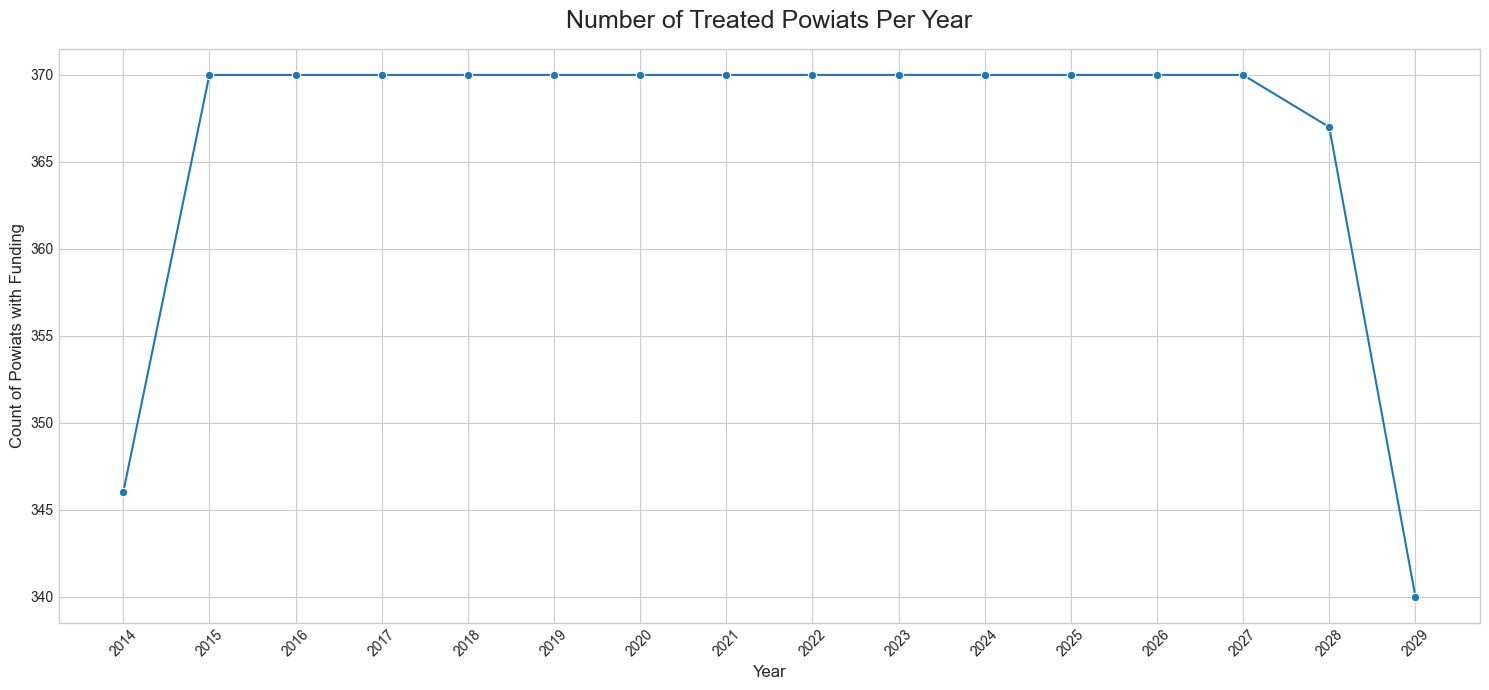

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'final_panel_df' is your DataFrame, loaded and ready.
# It must have 'powiat_std', 'year', and 'cofinancing_value' columns.

print("--- Creating a simple diagnostic line plot ---")

# --- 1. Prepare the data for aggregation ---
# Make a copy to ensure we don't modify the original DataFrame
df_agg = final_panel_df.copy()

# Filter for rows where treatment actually occurred (funding > 0)
treated_df = df_agg[df_agg['cofinancing_value'] > 0]

# --- 2. Aggregate the data by year ---
# For each year, count the number of unique powiats that received funding
yearly_treatment_counts = treated_df.groupby('year')['powiat_std'].nunique().reset_index()
yearly_treatment_counts = yearly_treatment_counts.rename(columns={'powiat_std': 'number_of_treated_powiats'})

print("\n--- Aggregated Data to be Plotted ---")
# This will show you exactly what data is being sent to the plot
print(yearly_treatment_counts)

# --- 3. Create the line plot ---
if not yearly_treatment_counts.empty:
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(15, 7))

    sns.lineplot(
        data=yearly_treatment_counts,
        x='year',
        y='number_of_treated_powiats',
        marker='o',
        ax=ax
    )

    ax.set_title('Number of Treated Powiats Per Year', fontsize=18, pad=15)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Count of Powiats with Funding', fontsize=12)

    # Ensure x-axis ticks are integers and cover the full range
    min_year = yearly_treatment_counts['year'].min()
    max_year = yearly_treatment_counts['year'].max()
    ax.set_xticks(range(int(min_year), int(max_year) + 1))
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nCRITICAL: No treated observations found in the data. The 'yearly_treatment_counts' DataFrame is empty.")



In [ ]:
from src.functions import standardize_polish_name

def find_untreated_powiats(panel_df, year_to_check, geodata_path=r'data/clean/geodata/powiaty.parquet'):
    """
    Identifies and lists all powiats that did not receive funding in a specific year.

    Args:
        panel_df (pd.DataFrame): Your final, flattened panel data.
        year_to_check (int): The year you want to inspect.
        geodata_path (str): Path to the reference geodata file.
    """
    print(f"--- Finding untreated powiats for the year {year_to_check} ---")

    # 1. Load the complete list of all powiats and standardize their names
    try:
        powiaty_gdf = gpd.read_parquet(geodata_path)
        powiaty_gdf['powiat_std'] = powiaty_gdf['JPT_NAZWA_'].apply(standardize_polish_name)
        all_powiats_std = set(powiaty_gdf['powiat_std'].unique())
        print(f"Loaded {len(all_powiats_std)} unique powiats from the reference file.")
    except Exception as e:
        print(f"ERROR: Could not load or process the geodata file. Details: {e}")
        return

    # 2. Identify the set of powiats that WERE treated in the specified year
    treated_df = panel_df[
        (panel_df['year'] == year_to_check) & 
        (panel_df['cofinancing_value'] > 0)
    ]
    treated_powiats_std = set(treated_df['powiat_std'].unique())
    print(f"Found {len(treated_powiats_std)} powiats with funding in {year_to_check}.")

    # 3. Find the difference between the two sets
    untreated_powiats_std = all_powiats_std - treated_powiats_std
    
    print(f"\nFound {len(untreated_powiats_std)} powiats that did NOT receive funding in {year_to_check}.")

    # 4. Display the list of untreated powiats using their original names for readability
    if untreated_powiats_std:
        # Create a map from standardized name back to original name
        label_map = powiaty_gdf.set_index('powiat_std')['JPT_NAZWA_']
        
        # Map the standardized names to their original, human-readable names
        untreated_powiat_names = sorted([label_map.get(name, name) for name in untreated_powiats_std])
        
        print("\nList of untreated powiats (up to 50):")
        print(untreated_powiat_names[:50])

# --- How to use this in your notebook ---
# After you have created your final_panel_df, call this function:

# find_untreated_powiats(final_panel_df, year_to_check=2014)


In [ ]:
find_untreated_powiats(final_panel_df, year_to_check=2014)


--- Finding untreated powiats for the year 2014 ---
Loaded 370 unique powiats from the reference file.
Found 346 powiats with funding in 2014.

Found 24 powiats that did NOT receive funding in 2014.

List of untreated powiats (up to 50):
['Piekary Śląskie', 'aleksandrowski', 'gostyniński', 'kwidzyński', 'kętrzyński', 'lipnowski', 'mogileński', 'namysłowski', 'nowomiejski', 'opatowski', 'ostrzeszowski', 'przysuski', 'rycki', 'rypiński', 'sejneński', 'strzelecko-drezdenecki', 'sępoleński', 'wieruszowski', 'wrzesiński', 'węgorzewski', 'włocławski', 'zwoleński', 'ząbkowicki', 'łosicki']
